<a href="https://colab.research.google.com/github/Uzi78/ML_Projects/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Classification**

## Introduction
This notebook demonstrates how to build and train a deep learning model for handwritten digit classification using the MNIST dataset. The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits (0-9), commonly used as a benchmark in machine learning. We will use TensorFlow and Keras to create a simple neural network that can accurately classify these digits.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

## Data Loading and Preprocessing

### Loading the MNIST Dataset
We begin by loading the MNIST dataset using TensorFlow Datasets (TFDS). TFDS provides a convenient way to access and manage various datasets, including MNIST.

***split=['train', 'test']:*** This argument specifies that we want to load both the training and testing splits of the MNIST dataset.

***shuffle_files=True:*** This ensures that the data is shuffled before loading, which can help improve model training.
as_supervised=True: This indicates that the dataset should be loaded as a tuple of (image, label) pairs, which is the format expected by most supervised learning models.

***with_info=True:*** This allows us to access metadata about the dataset, such as the number of examples in each split.

In [3]:
(ds_train, ds_test), ds_info = tfds.load('mnist',
                                         split=['train', 'test'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

### Data Normalization
Before feeding the data into our model, we need to normalize the pixel values. This involves scaling the pixel values to a range of 0 to 1. Normalization helps improve the training process and can lead to better model performance. We define a function called normalize to perform this operation:

In [8]:
def normalize(image,label):
  return tf.cast(image, tf.float32) / 255., label

In [9]:
ds_train = ds_train.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache().shuffle(ds_info.splits['test'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)

## Data Visualization

### Displaying Sample Images
To get a better understanding of the data, we visualize a few sample images from the training set. This helps us to see what the handwritten digits look like and verify that the data is loaded correctly.

In [10]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

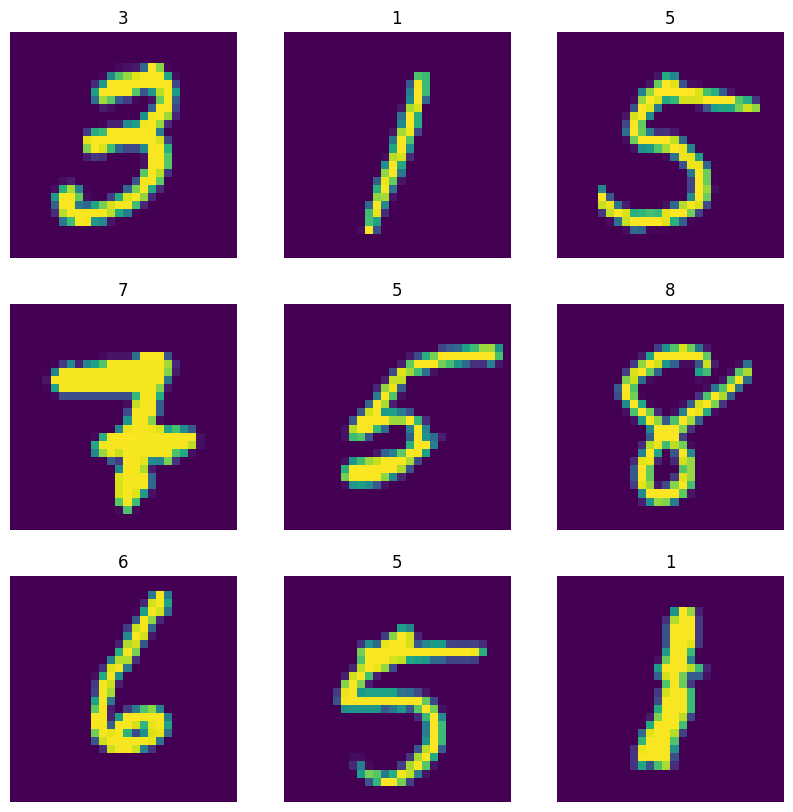

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    image = np.squeeze(images[i])
    plt.imshow(image)
    plt.title(classes[labels[i]])
    plt.axis('off')

## Model Building

### Model Architecture and Layer Selection
In this section, we define the architecture of our neural network model using the Keras Sequential API. The Sequential API allows us to create models by stacking layers on top of each other. We will be using a simple feedforward neural network with the following layers:

Flatten: This layer converts the 2D image data (28x28 pixels) into a 1D vector (784 elements). It serves as the input layer to our model.

Dense (128 units, ReLU activation): This is a fully connected layer with 128 neurons. It applies a Rectified Linear Unit (ReLU) activation function to introduce non-linearity into the model.

Dense (128 units, ReLU activation): Another fully connected layer with 128 neurons and ReLU activation.

Dense (10 units, Softmax activation): The output layer of our model. It has 10 neurons, representing the 10 possible digit classes (0-9). The Softmax activation function ensures that the output values are probabilities that sum up to 1.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

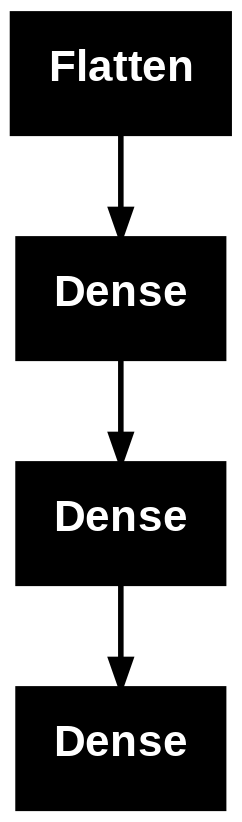

In [62]:
tf.keras.utils.plot_model(model)

### Model Compilation
Before training, we need to compile the model by specifying the optimizer, loss function, and metrics:

Optimizer: Adam is a popular optimization algorithm that adapts the learning rate during training. We set the learning rate to 0.01.
Loss Function: Sparse categorical cross-entropy is used as the loss function since we are dealing with a multi-class classification problem.
Metrics: Accuracy is used to evaluate the performance of the model during training and testing.

In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training and Evaluation

### Model Training (Fitting)
We train the model using the fit method. We provide the training data (ds_train), validation data (ds_test), and the number of training epochs (7).

In [64]:
history = model.fit(
    ds_train,
    validation_data = ds_test,
    epochs=7
)

Epoch 1/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8782 - loss: 0.3732 - val_accuracy: 0.9606 - val_loss: 0.1358
Epoch 2/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9636 - loss: 0.1196 - val_accuracy: 0.9682 - val_loss: 0.1053
Epoch 3/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9710 - loss: 0.0978 - val_accuracy: 0.9656 - val_loss: 0.1343
Epoch 4/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9743 - loss: 0.0854 - val_accuracy: 0.9585 - val_loss: 0.1583
Epoch 5/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9749 - loss: 0.0867 - val_accuracy: 0.9654 - val_loss: 0.1439
Epoch 6/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9799 - loss: 0.0707 - val_accuracy: 0.9729 - val_loss: 0.1229
Epoch 7/7
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9819 - loss: 0.0638 - val_accuracy: 0.9679 - val_loss: 0.1399


### Evaluating Model Performance
After training, we evaluate the model's performance on the test set using the evaluate method. This provides us with the loss and accuracy on the unseen test data.

In [66]:
loss, accuracy = model.evaluate(ds_test)
print('Test set accuracy: ', accuracy*100)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9706 - loss: 0.1265
Test set accuracy:  96.78999781608582


## Prediction and Visualization

### Making Predictions
We can use the trained model to make predictions on new images using the predict method. The output of predict is an array of probabilities for each class. We then use argmax to find the class with the highest probability, which represents the predicted digit.

In [67]:
pred = model.predict(ds_test)

pred = list(map(lambda x: np.argmax(x), pred))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [70]:
preds = model.predict(ds_test)
print("Shape of preds: ", preds.shape)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Shape of preds:  (10000, 10)


### Visualizing Predictions and Output
Finally, we visualize the predictions by displaying a grid of images from the test set along with their predicted labels. Correct predictions are shown in blue, while incorrect predictions are shown in red.

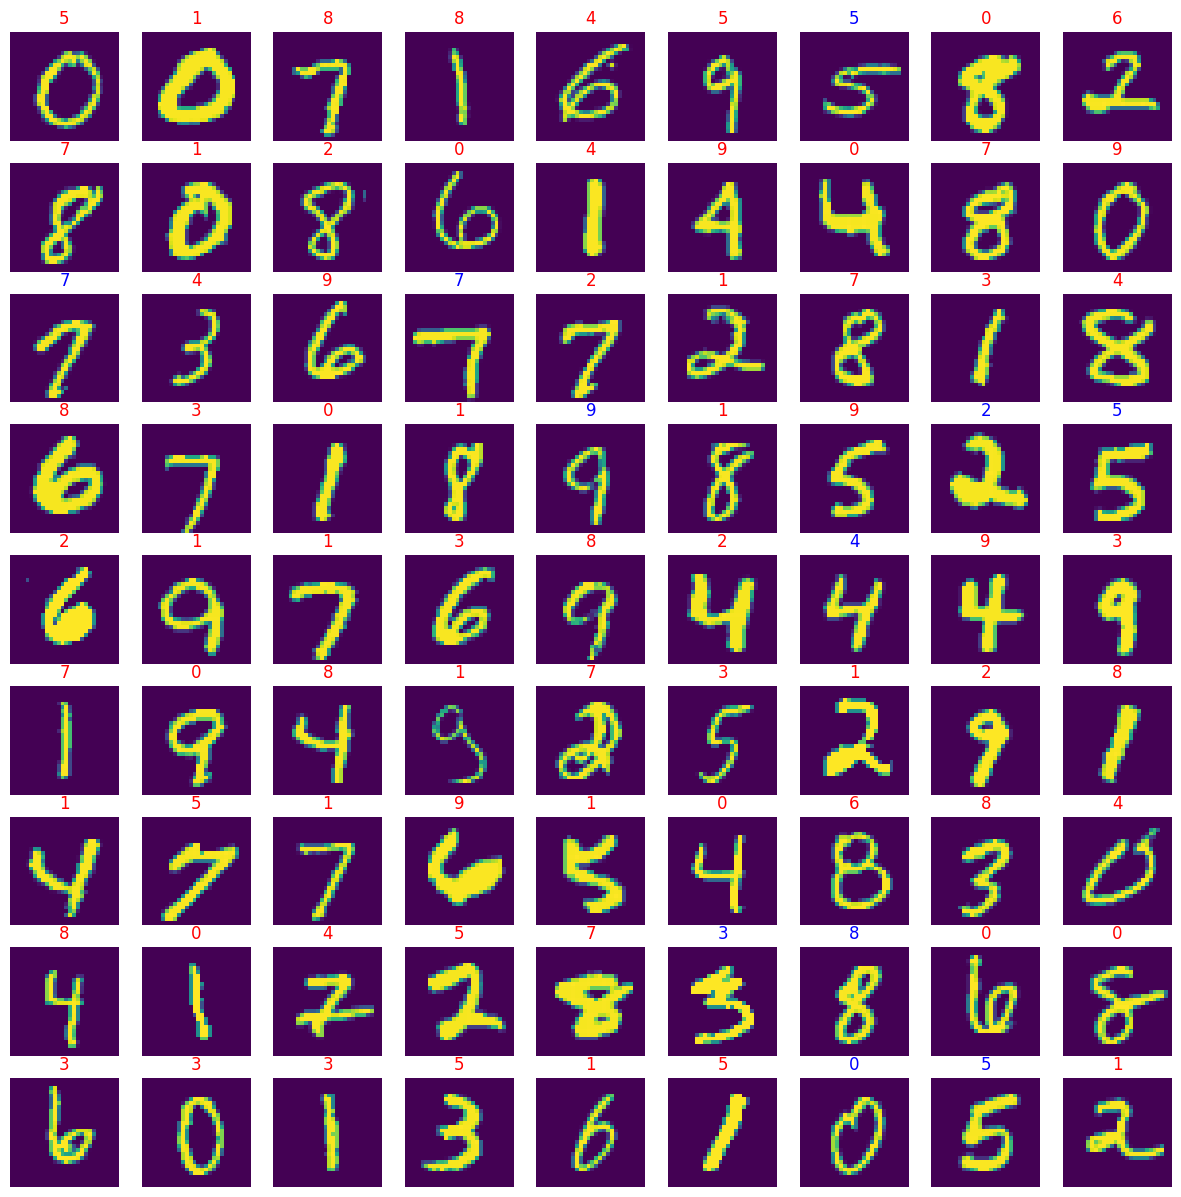

In [77]:
plt.figure(figsize=(15, 15))

for images, labels in ds_test.take(1):
  for i in range(81):
    ax = plt.subplot(9, 9, i+1 )
    image = np.squeeze(images[i])
    plt.imshow(image)
    prediction = pred[i] == classes[labels[i]]
    plt.title(pred[i], color=('blue' if prediction else 'red'))
    plt.axis('off')